<a href="https://colab.research.google.com/github/jemaldonado/Desafion-Neuron/blob/master/TIPS-GORJETA/TIPS_GORJETA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df_tips = pd.read_excel('https://github.com/jemaldonado/Desafion-Neuron/blob/master/TIPS-GORJETA/tips.xlsx?raw=true')

In [ ]:
df_tips

,total_bill,tip,sex,smoker,day,time,size_of_group
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
df_tips.dtypes

total_bill       float64
tip              float64
sex               object
smoker            object
day               object
time              object
size_of_group      int64
dtype: object

## Transformar categorias

In [ ]:
cat_df_tips = df_tips[['sex','smoker','day','time']]
cat_df_tips = pd.get_dummies(cat_df_tips)

In [ ]:
new_df_tips = df_tips[['total_bill','tip','size_of_group']].join(cat_df_tips)

In [ ]:
new_df_tips

,total_bill,tip,size_of_group,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,1,0,1,0,0,0,1,0,1,0
1,10.34,1.66,3,0,1,1,0,0,0,1,0,1,0
2,21.01,3.50,3,0,1,1,0,0,0,1,0,1,0
3,23.68,3.31,2,0,1,1,0,0,0,1,0,1,0
4,24.59,3.61,4,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,1,0,0,1,0,0,1,0
240,27.18,2.00,2,1,0,0,1,0,1,0,0,1,0
241,22.67,2.00,2,0,1,0,1,0,1,0,0,1,0
242,17.82,1.75,2,0,1,1,0,0,1,0,0,1,0


### Correlação smoker,sex,time 


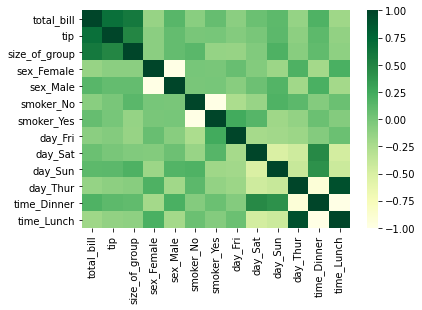

In [ ]:
sns.heatmap(new_df_tips.corr(),cmap="YlGn")

In [ ]:
df_corr_pearson = pd.DataFrame (new_df_tips.corr(method ='pearson')['tip'])
df_corr_pearson.sort_values('tip',ascending=False)

,tip
tip,1.000000
total_bill,0.675734
size_of_group,0.489299
day_Sun,0.125114
time_Dinner,0.121629
sex_Male,0.088862
smoker_Yes,0.005929
day_Sat,-0.002790
smoker_No,-0.005929
day_Fri,-0.055463


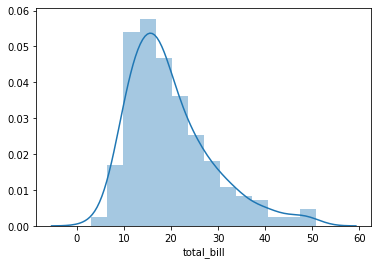

In [ ]:
sns.distplot(df_tips['total_bill'])

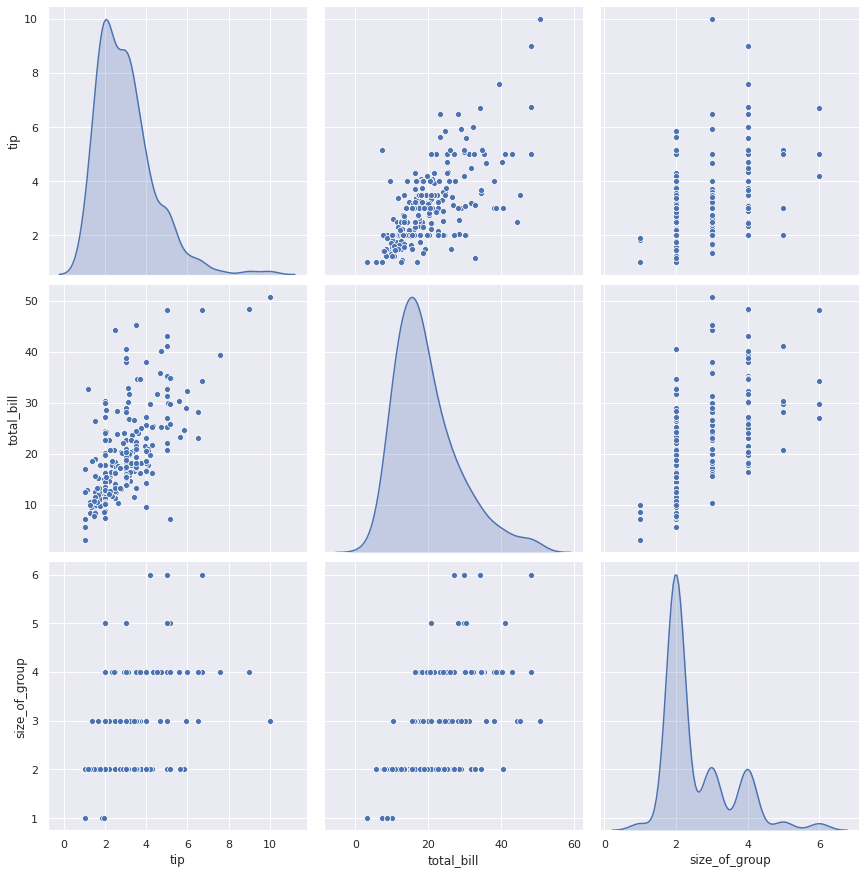

In [ ]:
# Pair plot
cols = ['tip','total_bill','size_of_group']

sns.set()
sns.pairplot(df_tips[cols], height=4, kind='scatter', diag_kind='kde')
plt.show()

### Gorjeta pelo tamanho do grupo

In [ ]:
#dados uniscos de tamanho de grupos de pessoas
print('Tamanho dos grupos : ',df_tips['size_of_group'].unique())

Tamanho dos grupos :  [2 3 4 1 6 5]


In [ ]:
print('Media de valor total e tip por quantidade de pessoas')
df_tips.groupby(['size_of_group']).mean()

Media de valor total e tip por quantidade de pessoas


,total_bill,tip
size_of_group,,
1,7.242500,1.437500
2,16.448013,2.582308
3,23.277632,3.393158
4,28.613514,4.135405
5,30.068000,4.028000
6,34.830000,5.225000


In [ ]:
df_stats = df_tips.groupby("size_of_group")["tip"].agg([pd.Series.mode, "count","median","mean","std"])
df_stats

,mode,count,median,mean,std
size_of_group,,,,,
1,1,4,1.415,1.437500,0.506516
2,2,156,2.500,2.582308,0.985501
3,3.5,38,3.290,3.393158,1.557344
4,"[2.0, 3.0]",37,3.760,4.135405,1.640668
5,5,5,5.000,4.028000,1.440111
6,5,4,5.000,5.225000,1.053170


In [ ]:
df_stats = df_tips.groupby("smoker")["tip"].agg([pd.Series.mode,"count","median","mean","std"])
df_stats

,mode,count,median,mean,std
smoker,,,,,
No,2.0,151,2.74,2.991854,1.377190
Yes,2.0,93,3.00,3.008710,1.401468


In [ ]:
df_stats = df_tips.groupby("sex")["tip"].agg([pd.Series.mode,"count", "median","mean","std"])
df_stats

,mode,count,median,mean,std
sex,,,,,
Female,2.0,87,2.75,2.833448,1.159495
Male,2.0,157,3.00,3.089618,1.489102


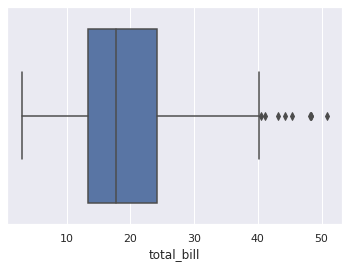

In [ ]:
ax = sns.boxplot(x=df_tips["total_bill"])

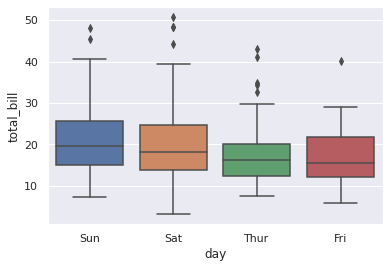

In [ ]:
ax = sns.boxplot(x="day", y="total_bill", data=df_tips)

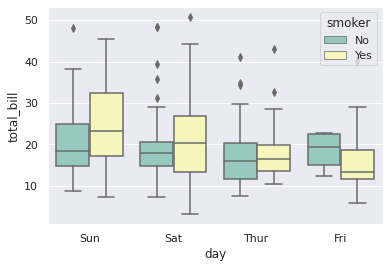

In [ ]:
ax = sns.boxplot(x="day", y="total_bill", hue="smoker",
                 data=df_tips, palette="Set3")

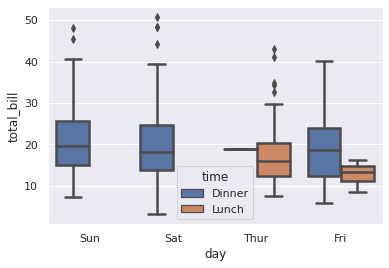

In [ ]:
ax = sns.boxplot(x="day", y="total_bill", hue="time",
                 data=df_tips, linewidth=2.5)

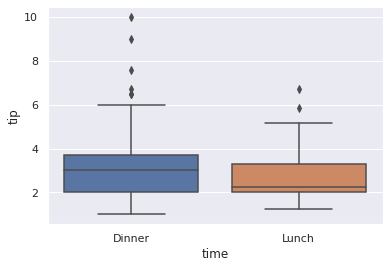

In [ ]:
ax = sns.boxplot(x="time", y="tip", data=df_tips,
                 order=["Dinner", "Lunch"])

### Total de Registros por sexo

In [ ]:
df_tips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

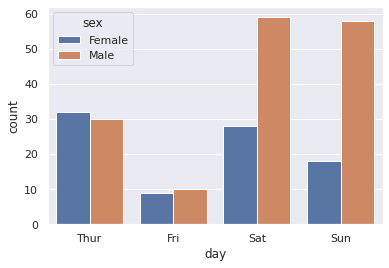

In [ ]:
sns.countplot(x='day',data=df_tips,hue='sex',order=["Thur","Fri","Sat",'Sun'])
plt.show()

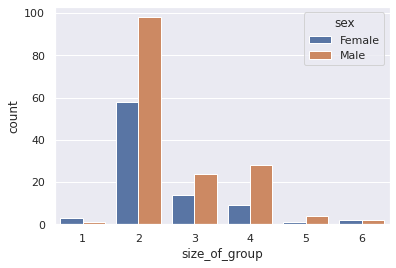

In [ ]:
sns.countplot(x='size_of_group',data=df_tips,hue='sex')
plt.show()

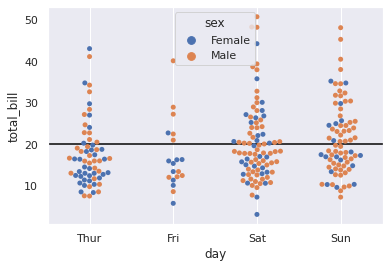

In [ ]:
sns.swarmplot(x='day',y='total_bill',data=df_tips,hue='sex',order=["Thur","Fri","Sat",'Sun'])
plt.grid()
plt.axhline(20,color='black')
plt.show()

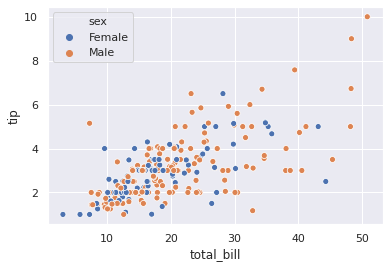

In [ ]:
sns.scatterplot(x='total_bill',y='tip',data=df_tips,hue='sex')
plt.show()

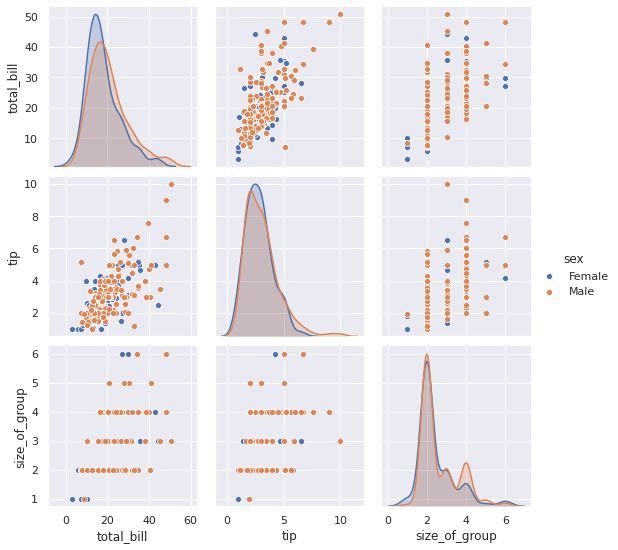

In [ ]:
sns.pairplot(data=df_tips,hue='sex')
plt.show()

### Media de TIPS por dia - Ticket Medio

In [ ]:
df_tips.groupby(['day']).mean().sort_values(by=['total_bill'], ascending = False)

,total_bill,tip,size_of_group
day,,,
Sun,21.410000,3.255132,2.842105
Sat,20.441379,2.993103,2.517241
Thur,17.682742,2.771452,2.451613
Fri,17.151579,2.734737,2.105263


In [ ]:
df_tips.groupby(['day']).median().sort_values(by=['total_bill'], ascending = False)

,total_bill,tip,size_of_group
day,,,
Sun,19.63,3.150,2
Sat,18.24,2.750,2
Thur,16.20,2.305,2
Fri,15.38,3.000,2


### Gorjeta é maior no almoço ou jantar?

In [ ]:
df_tips.groupby(['time']).mean()

,total_bill,tip,size_of_group
time,,,
Dinner,20.797159,3.102670,2.630682
Lunch,17.168676,2.728088,2.411765


### Existe relação entre pagamento Fumante/Não fumante?

In [ ]:
df_tips.groupby(['smoker']).mean()

,total_bill,tip,size_of_group
smoker,,,
No,19.188278,2.991854,2.668874
Yes,20.756344,3.008710,2.408602


### Qual dia seria mais intessante para promoção?

In [ ]:
df_tips.groupby(['day','time']).sum().sort_values(by=['total_bill'], ascending=False)

total_bill     tip  size_of_group
day  time                                     
Sat  Dinner     1778.40  260.40            219
Sun  Dinner     1627.16  247.39            216
Thur Lunch      1077.55  168.83            150
Fri  Dinner      235.96   35.28             26
     Lunch        89.92   16.68             14
Thur Dinner       18.78    3.00              2

 ### Médias


In [ ]:
df_tips["total_bill_person"]=df_tips["total_bill"]/df_tips["size_of_group"]
df_tips["tip_person"] = df_tips["tip"]/df_tips["size_of_group"]
df_tips["tip_perc"]= df_tips["tip"]/df_tips["total_bill"]
df_tips=df_tips[["size_of_group","total_bill","tip","tip_perc","total_bill_person","tip_person","sex","smoker","day","time"]]
df_tips

,size_of_group,total_bill,tip,tip_perc,total_bill_person,tip_person,sex,smoker,day,time
0,2,16.99,1.01,0.059447,8.495000,0.505000,Female,No,Sun,Dinner
1,3,10.34,1.66,0.160542,3.446667,0.553333,Male,No,Sun,Dinner
2,3,21.01,3.50,0.166587,7.003333,1.166667,Male,No,Sun,Dinner
3,2,23.68,3.31,0.139780,11.840000,1.655000,Male,No,Sun,Dinner
4,4,24.59,3.61,0.146808,6.147500,0.902500,Female,No,Sun,Dinner
...,...,...,...,...,...,...,...,...,...,...
239,3,29.03,5.92,0.203927,9.676667,1.973333,Male,No,Sat,Dinner
240,2,27.18,2.00,0.073584,13.590000,1.000000,Female,Yes,Sat,Dinner
241,2,22.67,2.00,0.088222,11.335000,1.000000,Male,Yes,Sat,Dinner
242,2,17.82,1.75,0.098204,8.910000,0.875000,Male,No,Sat,Dinner


In [ ]:
df_tips.describe()

,size_of_group,total_bill,tip,tip_perc,total_bill_person,tip_person
count,244.000000,244.000000,244.000000,244.000000,244.00000,244.000000
mean,2.569672,19.785943,2.998279,0.160803,7.88823,1.212762
std,0.951100,8.902412,1.383638,0.061072,2.91435,0.491705
min,1.000000,3.070000,1.000000,0.035638,2.87500,0.400000
25%,2.000000,13.347500,2.000000,0.129127,5.80250,0.862500
50%,2.000000,17.795000,2.900000,0.154770,7.25500,1.107500
75%,3.000000,24.127500,3.562500,0.191475,9.39000,1.500000
max,6.000000,50.810000,10.000000,0.710345,20.27500,3.333333


### Relação tipos pessoa / pagamento

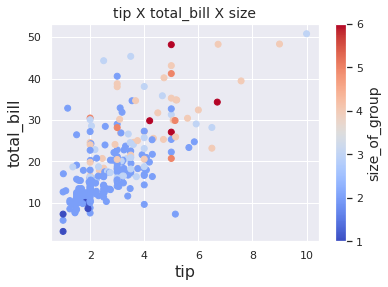

In [ ]:
#copiei esse do código do modelo do nicholas

fig, ax = plt.subplots()

# o parâmetro "c" define a variável da colorbar
cbar = ax.scatter(df_tips['tip'], (df_tips['total_bill']),  c=df_tips['size_of_group'], cmap=plt.cm.coolwarm)


#Cria o titulo com o tamanho da fonte desejada
ax.set_title('tip X total_bill X size', fontsize=14)

#Cria a legenda para os eixos
ax.set_ylabel('total_bill', fontsize=16)
ax.set_xlabel('tip', fontsize=16)

#Cria Legenda para o color bar
label_bar = plt.colorbar(cbar)
label_bar.set_label('size_of_group',fontsize=14)


plt.show()

###

In [ ]:
#df_tips.groupby(['day']).mean()
#df_tips.groupby(['time']).mean()
#df_tips.groupby(['day','time']).count()
#df_tips.groupby(['day','time']).mean()
#df_tips.groupby(['day','time']).sum()

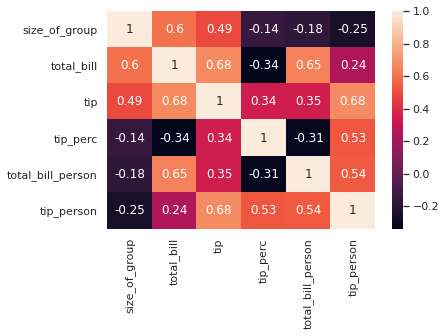

In [ ]:
sns.heatmap(df_tips.corr(), annot=True)
plt.show()

In [ ]:
df_tips["total_bill_person"]=df_tips["total_bill"]/df_tips["size_of_group"]
df_tips["tip_person"] = df_tips["tip"]/df_tips["size_of_group"]
df_tips["tip_perc"]= df_tips["tip"]/df_tips["total_bill"]
df_tips=df_tips[["size_of_group","total_bill","tip","tip_perc","total_bill_person","tip_person","sex","smoker","day","time"]]
df_tips.head(3)

,size_of_group,total_bill,tip,tip_perc,total_bill_person,tip_person,sex,smoker,day,time
0,2,16.99,1.01,0.059447,8.495000,0.505000,Female,No,Sun,Dinner
1,3,10.34,1.66,0.160542,3.446667,0.553333,Male,No,Sun,Dinner
2,3,21.01,3.50,0.166587,7.003333,1.166667,Male,No,Sun,Dinner


In [ ]:
df_tips.corr()

,size_of_group,total_bill,tip,tip_perc,total_bill_person,tip_person
size_of_group,1.000000,0.598315,0.489299,-0.142860,-0.175412,-0.253618
total_bill,0.598315,1.000000,0.675734,-0.338624,0.647497,0.240988
tip,0.489299,0.675734,1.000000,0.342370,0.347393,0.677494
tip_perc,-0.142860,-0.338624,0.342370,1.000000,-0.314156,0.526801
total_bill_person,-0.175412,0.647497,0.347393,-0.314156,1.000000,0.537820
tip_person,-0.253618,0.240988,0.677494,0.526801,0.537820,1.000000


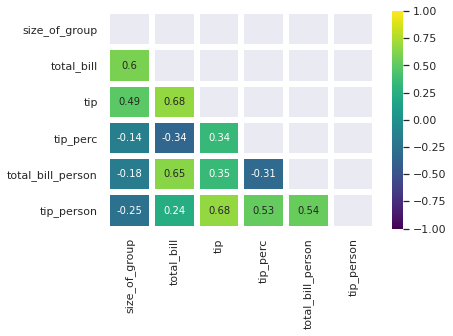

In [ ]:
mask  =  np.triu ( np.ones (df_tips.corr().shape , dtype  =  bool ))
sns.heatmap(df_tips.corr(), annot=True, mask  =  mask , annot_kws={"size": 10} ,cmap="viridis",linewidths=5, vmin=-1, vmax=1)
plt.show()

In [ ]:
df_tips.head()

,size_of_group,total_bill,tip,tip_perc,total_bill_person,tip_person,sex,smoker,day,time
0,2,16.99,1.01,0.059447,8.495000,0.505000,Female,No,Sun,Dinner
1,3,10.34,1.66,0.160542,3.446667,0.553333,Male,No,Sun,Dinner
2,3,21.01,3.50,0.166587,7.003333,1.166667,Male,No,Sun,Dinner
3,2,23.68,3.31,0.139780,11.840000,1.655000,Male,No,Sun,Dinner
4,4,24.59,3.61,0.146808,6.147500,0.902500,Female,No,Sun,Dinner


Kluster